#  **Supermarket Sales Dashboard – Mini Project**

### **Data Loading & Cleaning**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("/home/anis/code/jnotebook/Milestone1_project/SuperMarket Analysis.csv")
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00 AM         Cash   76.40                 4.761905        3.8200   
2   1:23:00 PM  Credit card  324.31                 4.761905       16.2155   
3   8:33:00 PM      Ewallet  465.76                 4.761905       23.2880   
4  10:37:00 AM      Ewallet  604.17                 4.761905       30.2085   

   Rating  
0     9.1  
1     9.6  
2     7.4  
3     8.4  
4     5.3

In [45]:
df.shape

(1000, 17)

In [46]:
df.describe()

Unit price     Quantity       Tax 5%        Sales        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**In this dataset, no missing or null value is found**

In [48]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [49]:
df["Date"] = pd.to_datetime(df["Date"])

In [50]:
df["Month"] = df["Date"].dt.month_name()

In [51]:
df["Day"]=df["Date"].dt.day_name()

In [52]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00 AM         Cash   76.40                 4.761905        3.8200   
2   1:23:00 PM  Credit card  324.31                 4.761905       16.2155   
3   8:33:00 PM      Ewallet  465.76                 4.761905       23.2880   
4  10:37:00 AM      Ewallet  604.17                 4.761905       30.2085   

   Rating     Month       Day  
0     9.1   January  Saturday  
1     9.6     March    Friday  
2     7.4     March    Sunday  
3     8.4   January    Sunday  
4     5.3  February    Friday

## **EDA**

In [53]:
# Total Revenue 
totalRevenue = df["Unit price"] * df["Quantity"]
df["Revenue"] = np.array(totalRevenue)

In [54]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428   Alex     Yangon        Member  Female   
1  226-31-3081   Giza  Naypyitaw        Normal  Female   
2  631-41-3108   Alex     Yangon        Normal  Female   
3  123-19-1176   Alex     Yangon        Member  Female   
4  373-73-7910   Alex     Yangon        Member  Female   

             Product line  Unit price  Quantity   Tax 5%     Sales       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715 2019-01-05   
1  Electronic accessories       15.28         5   3.8200   80.2200 2019-03-08   
2      Home and lifestyle       46.33         7  16.2155  340.5255 2019-03-03   
3       Health and beauty       58.22         8  23.2880  489.0480 2019-01-27   
4       Sports and travel       86.31         7  30.2085  634.3785 2019-02-08   

          Time      Payment    cogs  gross margin percentage  gross income  \
0   1:08:00 PM      Ewallet  522.83                 4.761905       26.1415   
1  10:29:00 AM         Cash   76.40                 4.761905        3.8200   
2   1:23:00 PM  Credit card  324.31                 4.761905       16.2155   
3   8:33:00 PM      Ewallet  465.76                 4.761905       23.2880   
4  10:37:00 AM      Ewallet  604.17                 4.761905       30.2085   

   Rating     Month       Day  Revenue  
0     9.1   January  Saturday   522.83  
1     9.6     March    Friday    76.40  
2     7.4     March    Sunday   324.31  
3     8.4   January    Sunday   465.76  
4     5.3  February    Friday   604.17

## Total Revenue by city

In [72]:
df.groupby("City").Revenue.sum().sort_values(ascending=False)

City
Naypyitaw    105303.53
Yangon       101143.21
Mandalay     101140.64
Name: Revenue, dtype: float64

## Average Rating per Product Line

In [71]:
df.groupby(["Product line"]).Rating.mean().sort_values(ascending=False)

Product line
Food and beverages        7.113218
Fashion accessories       7.029213
Health and beauty         7.003289
Electronic accessories    6.924706
Sports and travel         6.916265
Home and lifestyle        6.837500
Name: Rating, dtype: float64

## Revenue by gender and payment method

In [70]:
df.groupby(["Gender","Payment"]).Revenue.mean().sort_values(ascending=False)

Gender  Payment    
Female  Ewallet        333.900546
        Cash           322.170683
        Credit card    318.322186
Male    Credit card    294.653750
        Cash           293.657626
        Ewallet        269.453951
Name: Revenue, dtype: float64

## Revenue Per Branch

In [69]:
df.groupby(["Branch"]).Revenue.sum().sort_values(ascending=False)

Branch
Giza     105303.53
Alex     101143.21
Cairo    101140.64
Name: Revenue, dtype: float64

## Most popular product line

In [68]:
df.groupby(["Product line"]).Quantity.sum().sort_values(ascending=False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

# **Data Visualization**

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='Month', ylabel='Revenue'>

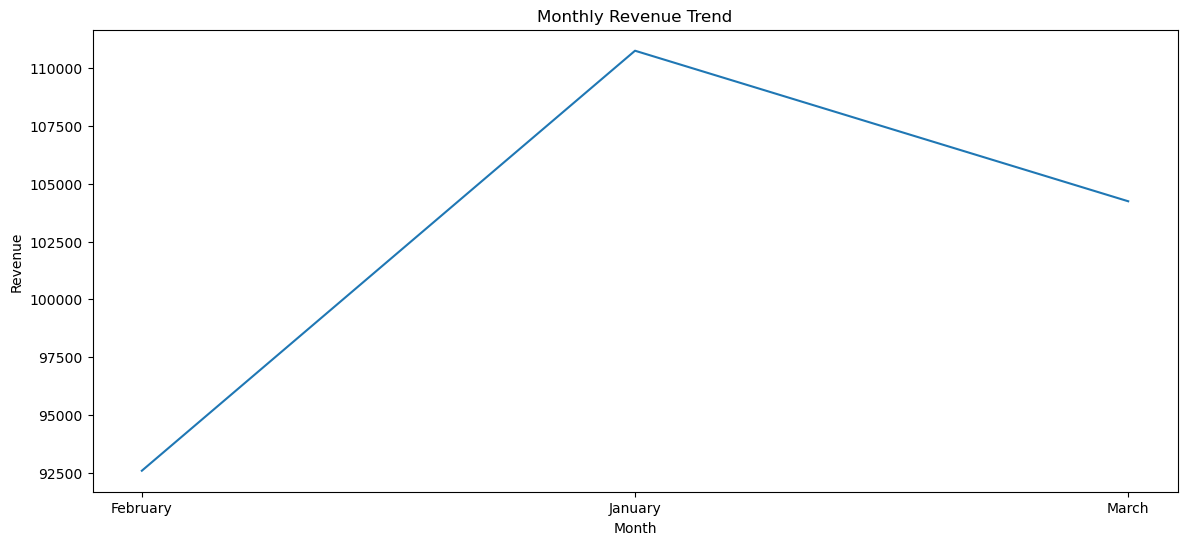

In [76]:
plt.figure(figsize=(14,6))
plt.title("Monthly Revenue Trend")
monthlyRevenue = df.groupby("Month").Revenue.sum().reset_index()
monthlyRevenue
sns.lineplot(data=monthlyRevenue,x="Month",y="Revenue")
           

<Axes: title={'center': 'Revenue by Product Line'}, xlabel='Product line', ylabel='Revenue'>

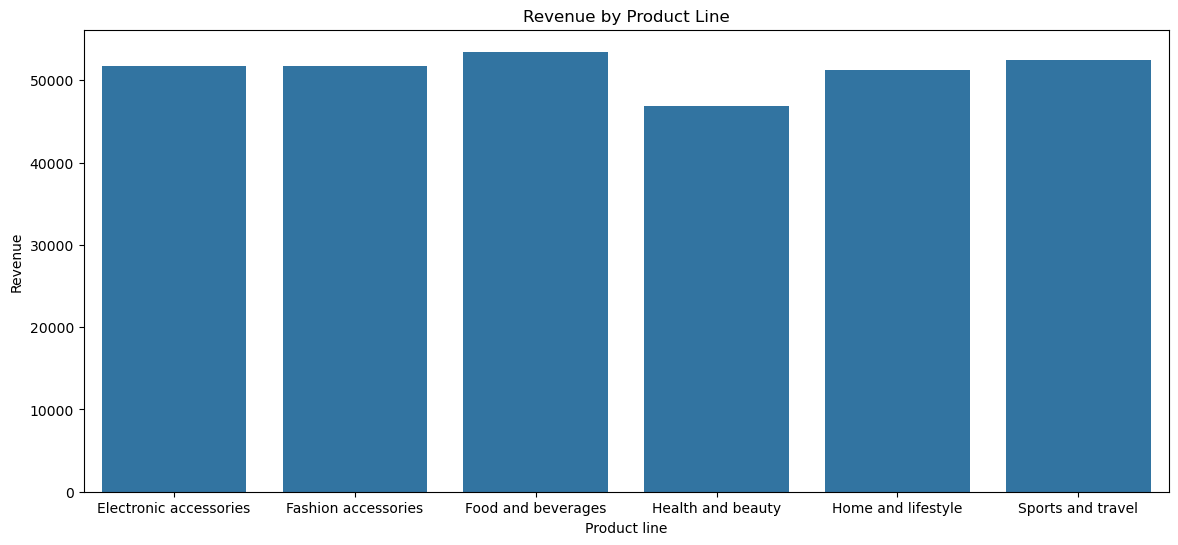

In [81]:
plt.figure(figsize=(14,6))
plt.title("Revenue by Product Line")
sns.barplot(data=df.groupby("Product line").Revenue.sum().reset_index(),x="Product line",y="Revenue")

/home/anis/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


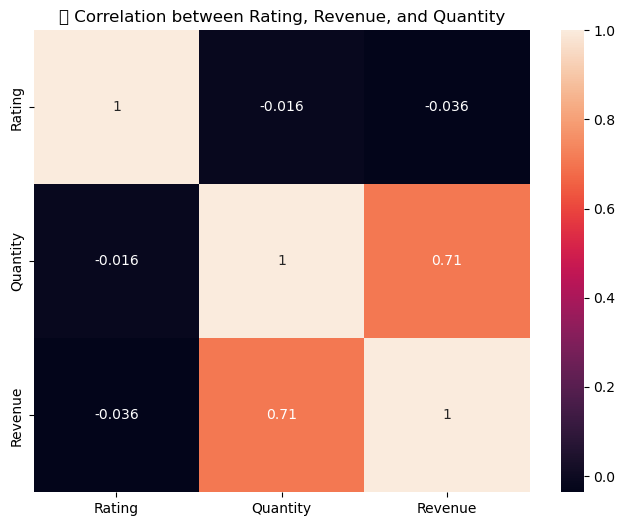

In [90]:
correlation = df[["Rating", "Quantity", "Revenue"]].corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=correlation, annot=True)
plt.title("🔥 Correlation between Rating, Revenue, and Quantity")
plt.show()